# Data Project Proposal
<li><font size="4">Class:DAV 5300 Computational Mathematics and Statistics</font>
<li><font size="4">Director:Jason Bryer </font>
<li><font size="4">Author:Zhengnan Li, Qing Dou, Yu Wang</font>

### 1. Data Preparation

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
chips = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV_5300/main/Data_Project/src/chip_dataset.csv')
chips['Release Date'] = pd.to_datetime(chips['Release Date'])
chips = chips.drop(columns=['Type'])
chips

,Product,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor
0,AMD Athlon 64 3500+,2007-02-20,65,45,77.0,122,2200,AMD
1,AMD Athlon 200GE,2018-09-06,14,35,192.0,4800,3200,AMD
2,Intel Xeon E5-2603 v2,2013-09-01,22,80,160.0,1400,1800,Intel
3,AMD Phenom II X4 980 BE,2011-05-03,45,125,258.0,758,3700,AMD
4,Intel Xeon E5-2470 v2,2013-09-01,22,95,160.0,1400,2400,Intel
...,...,...,...,...,...,...,...,...
3494,ATI FirePro V7800,2010-04-26,40,150,334.0,2154,700,ATI
3495,NVIDIA Tegra 3 GPU,2011-11-09,40,20,80.0,10,416,NVIDIA
3496,NVIDIA Playstation 3 GPU 28nm,2013-06-03,28,21,68.0,302,550,NVIDIA
3497,NVIDIA Quadro 3000M,2011-02-22,40,75,332.0,1950,450,NVIDIA


In [2]:
score = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV_5300/main/Data_Project/src/score.csv')
score

,Product,Score
0,Intel Core i9-14900KF,3108
1,Intel Core i9-13900KS,3105
2,Intel Core i9-14900K,3101
3,Intel Core i9-14900F,3020
4,Intel Core i7-14700KF,2975
...,...,...
3231,Intel Pentium SU2700,138
3232,AMD Athlon 1640B,136
3233,AMD E-300,129
3234,AMD C-50,123


In [3]:
chips = pd.merge(chips, score, on='Product', how='inner')
chips

,Product,Release Date,Process Size,TDP,Die Size,Transistors,Freq,Vendor,Score
0,AMD Athlon 64 3500+,2007-02-20,65,45,77.0,122,2200,AMD,129
1,AMD Athlon 64 3500+,2007-02-20,65,45,77.0,122,2200,AMD,116
2,AMD Athlon 64 3500+,2001-01-01,90,67,115.0,105,2200,AMD,129
3,AMD Athlon 64 3500+,2001-01-01,90,67,115.0,105,2200,AMD,116
4,AMD Athlon 64 3500+,2005-05-31,90,67,156.0,154,2200,AMD,129
...,...,...,...,...,...,...,...,...,...
939,Intel Core i7-4600M,2013-09-01,22,37,118.0,1300,2900,Intel,1956
940,AMD Ryzen 9 4900H,2020-03-16,7,54,156.0,9800,3300,AMD,1546
941,AMD Ryzen 9 4900H,2020-03-16,7,54,156.0,9800,3300,AMD,6772
942,Intel Core 2 Duo E6550,2007-07-01,65,65,143.0,291,2333,Intel,260


### 2. Research question 

- Research Questions:  
__Is there a correlation between different performance metrics of chips and its score?__

- Explaination:  
We aim to investigate the relationships between various performance characteristics of semiconductor chips to determine if there are significant correlations among them. Specifically, this study seeks to understand if certain performance metrics can predict others, thereby offering insights into the design and optimization of semiconductor chips. The primary objectives include identifying key performance indicators (KPIs) that are closely related, quantifying the strength of these relationships, and evaluating the feasibility of using certain metrics to predict others in the context of chip performance and design optimization.

### 3. Cases 

The cases in our dataset are individual Chip performance. Each row represents a distinct chip performance, with the dataset containing 3499 cases in total.

In [4]:
chips.shape

(944, 9)

### 4. Variables

In order to better understand the meaning of the table. Here is the explaination of each column
| Variable       | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| Product        | Description of the products.                                                                  |
| Type           | Classification of CPU and GPU.                                                                |
| Release Date   | The date of the product publish.                                                              |
| Process Size   | The size of the features (the elements that make up the transistors) in nanometers (nm).      |
| TDP (W)        | Thermal design power, the theoretical maximum amount of heat generated by a CPU or GPU.       |
| Die Size       | The physical dimensions of a bare die, representing the die size of a specific chip.          |
| Transistors    | Tiny electronic switches that can be turned on or off by applying a voltage to their terminals.|
| Freq           | The clock rate of a CPU, normally determined by the frequency of an oscillator crystal.       |
| Vendor         | The company that produces the chip.                                                            |


### 5. Data collection

Data was compiled from dataset wbesite which is about hardware review.

### 6. Type of study 

This study is observational. The data were collected without manipulating the variables, observing the characteristics of CPUs as they have been released by their vendors.

### 7. Data Source 

Data was compiled from dataset wbesite which is about hardware review. Click the link to see the dataset.  
[Chip of CPU and GPU](https://www.heywhale.com/mw/dataset/64dc9b5000151985794c41a9/content)

### 8. Describe your variables?

- Quantitative: Process Size, TDP, Die Size, Transistors, Freq.
- Qualitative: Product, Type, Release Date, Vendor.

### 9. Relevant summary statistics 

 #### 9.1. Summary statistics
- For quantitative variables:

In [5]:
summary_stats = chips[['Process Size', 'TDP', 'Die Size', 'Transistors', 'Freq']].describe()
print(summary_stats)

       Process Size         TDP    Die Size   Transistors         Freq
count    944.000000  944.000000  932.000000    944.000000   944.000000
mean      29.970339   77.502119  176.667382   1941.396186  2844.959746
std       16.627768   48.830219   70.325398   2616.082117   631.421185
min        7.000000    9.000000   66.000000     49.000000  1000.000000
25%       22.000000   45.000000  118.000000    504.000000  2400.000000
50%       32.000000   65.000000  169.000000   1178.000000  2900.000000
75%       32.000000   95.000000  228.000000   1400.000000  3333.000000
max      130.000000  280.000000  435.000000  19200.000000  4700.000000


- For qualitative variables:

In [6]:
def qualitative(df, column_name):
    
    unique_values = df[column_name].value_counts()
    return unique_values
unique_vendors = qualitative(chips, 'Vendor')
unique_release_date = qualitative(chips, 'Release Date')
print(unique_vendors)
print("--------------------------")

Vendor
Intel    562
AMD      382
Name: count, dtype: int64
--------------------------


#### 9.2 Visualizations

For visualizations relevant to our research question, scatter plots can effectively show the relationship between the CPU's operating frequency (Freq) and each of the following: Process Size, TDP, Die Size, and the number of Transistors. Coloring these plots by the Vendor can provide insights into any differences between CPU manufacturers.

- Vendors  
Explore the distribution of vendors

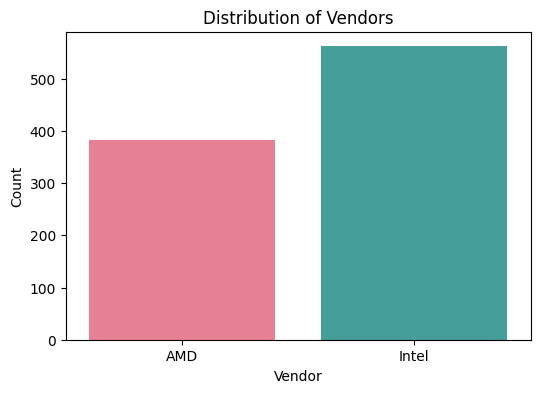

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(
x='Vendor', data=chips, palette='husl', hue='Vendor', legend=False
)
plt.title('Distribution of Vendors')
# Set labels and title
plt.xlabel('Vendor')
plt.ylabel('Count')
plt.show()

- Quantitative variables distribution and relationship between vendors and release date

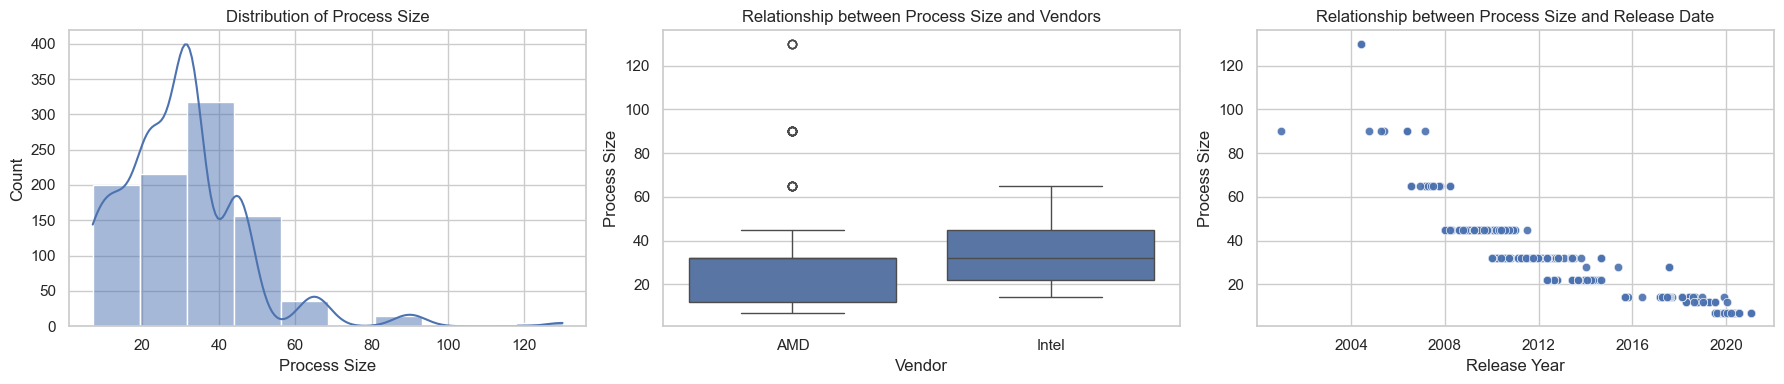

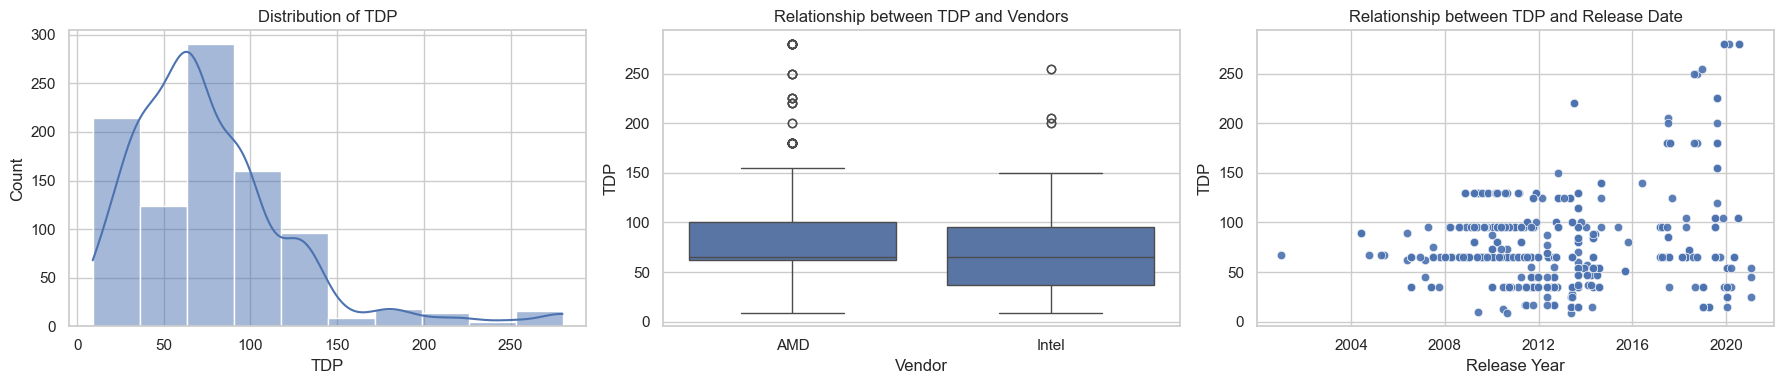

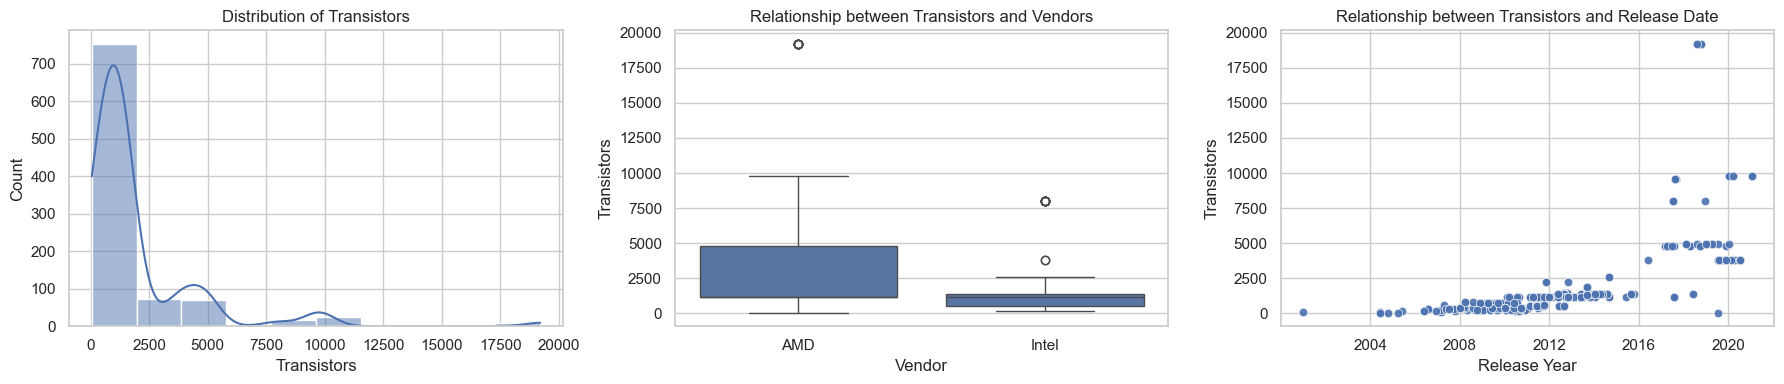

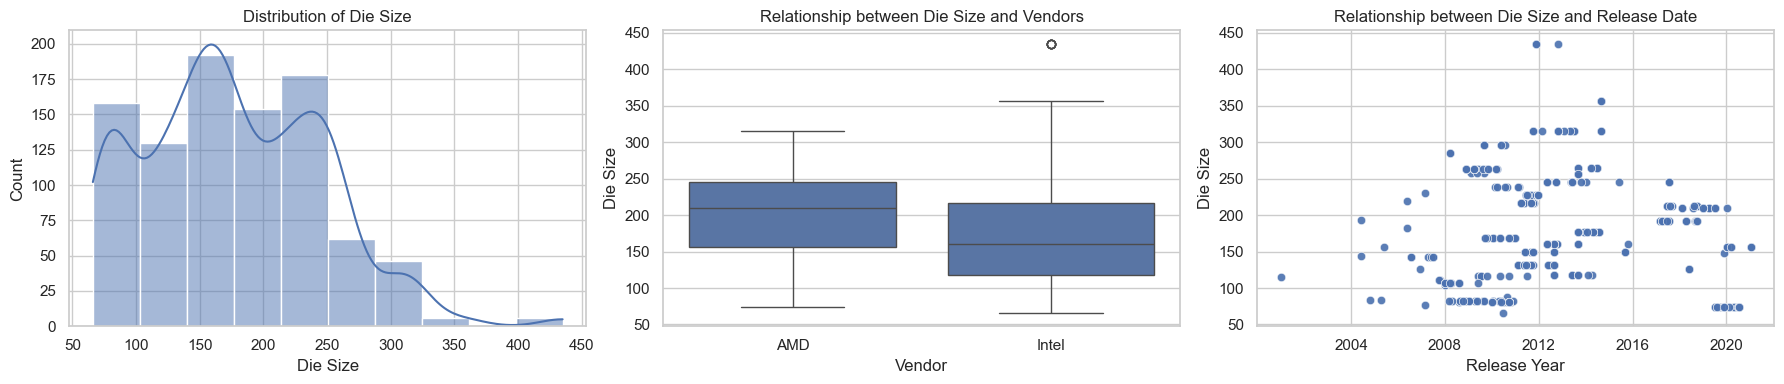

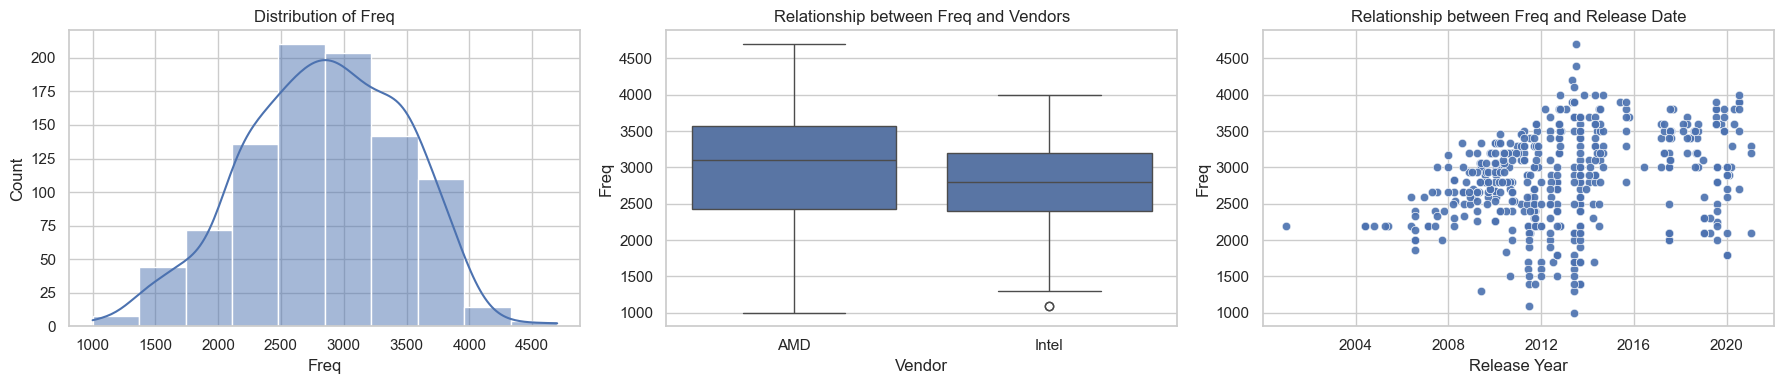

In [8]:
variables = ['Process Size', 'TDP', 'Transistors', 'Die Size', 'Freq']  
sns.set(style="whitegrid")

for var in variables:
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))  
    
    # set quantitative variables distribution
    sns.histplot(data=chips, x=var, kde=True, bins=10, ax=axs[0])
    axs[0].set_title(f'Distribution of {var}')
    axs[0].set_xlabel(var)
    axs[0].set_ylabel('Count')
    
    # set the relationship between quantitative variables and vendors
    sns.boxplot(x='Vendor', y=var, data=chips, ax=axs[1])
    axs[1].set_title(f'Relationship between {var} and Vendors')
    axs[1].set_xlabel('Vendor')
    axs[1].set_ylabel(var)
    
    # set the relationship between quantitative variables and release date
    sns.scatterplot(x='Release Date', y=var, data=chips,alpha=0.7, ax=axs[2])
    axs[2].set_title(f'Relationship between {var} and Release Date')
    axs[2].set_xlabel('Release Year')
    axs[2].set_ylabel(var)
    
    plt.tight_layout() 
    plt.show()

- Pairplot for quantitative variables.

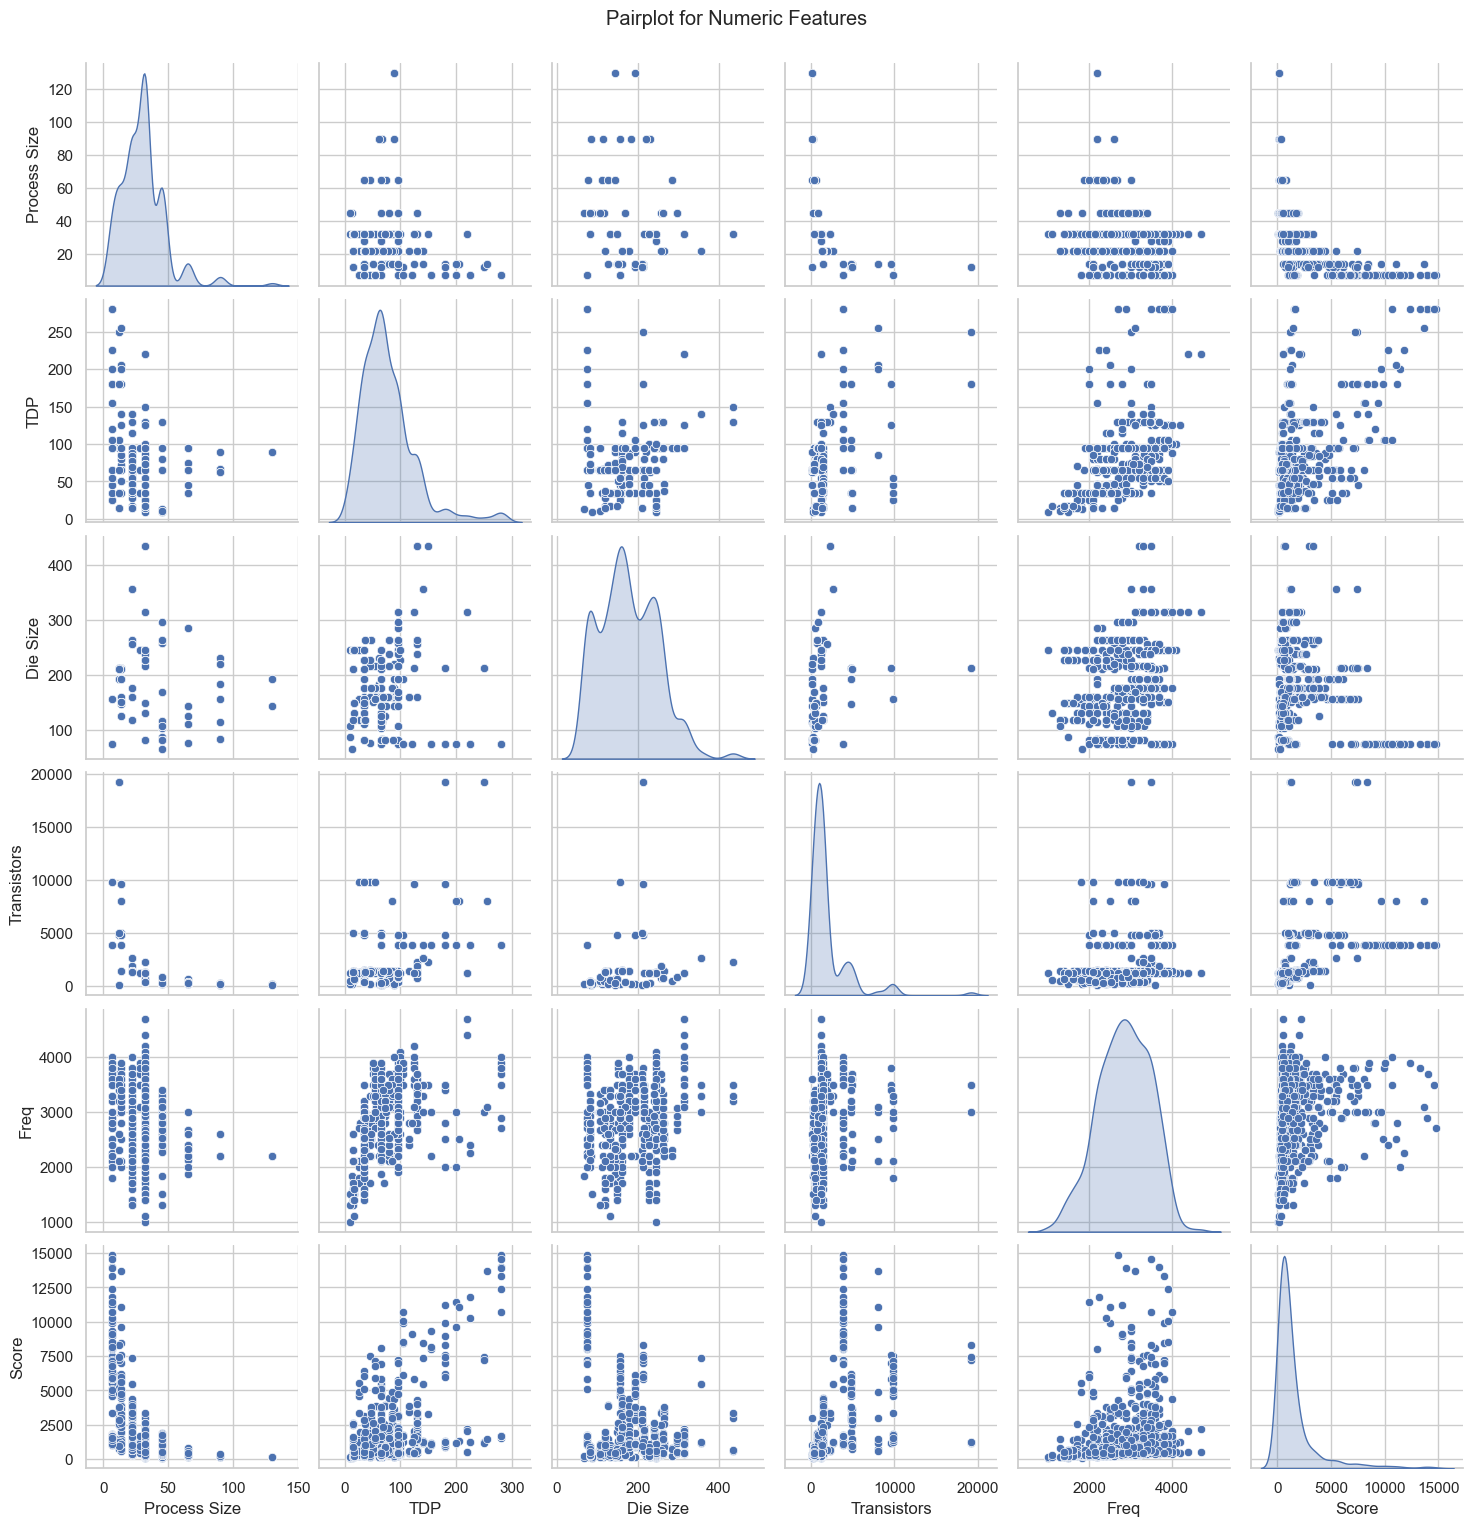

In [9]:
sns.pairplot(chips,  diag_kind='kde')
plt.suptitle('Pairplot for Numeric Features', y=1.02)
plt.show()

- Heatmap for quantitative variables.

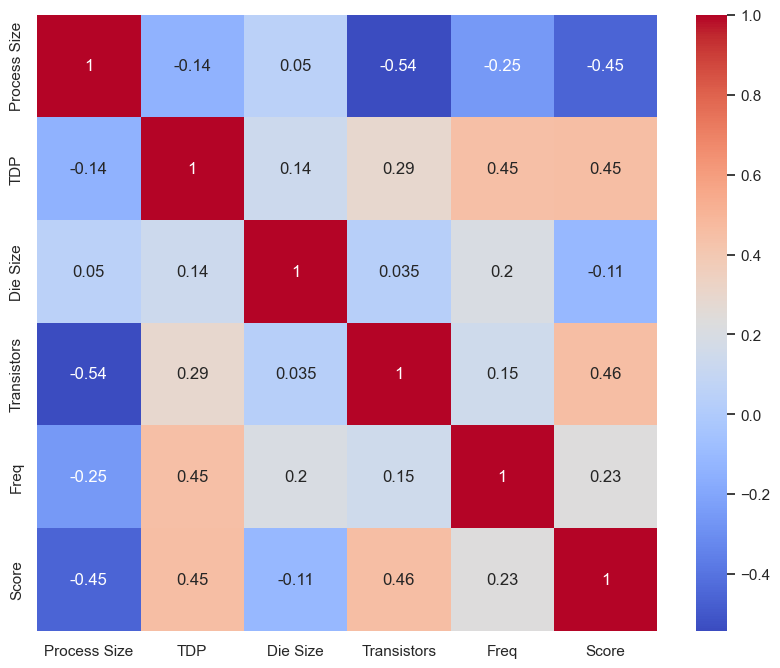

In [10]:
numerical_cols = chips.select_dtypes(include=['float64', 'int64']).columns

corr = chips[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()